<a href="https://colab.research.google.com/github/avcmunoz/PROYECTO_DS_ALICE_C/blob/main/Proyecto_DS_ParteIII_Castellanos_alice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto final Data science I**
### Nombre: Alice Castellanos
### Dataset: Personality Data
### Comisión: 74235

## **1. Abstract**

Este proyecto analiza el dataset Personality data obtenido de Kaggle, que contiene información referente a los rasgos de personalidad de los extroveritos e introvertidos y como interactuan con el ambiente social para entender el espectro de la personalidad humana.

La información contiene:
*   Time_spent_alone: Horas de soledad (rango de 0-11)
*   Stage_fear: Miedo escenico (Yes/No).
*   Social_event_attendance: Frecuencia a eventos sociales (0–10).
*   Going_outside: Frecuencia a salidas al exterior (0–7)
*   Drained_after_socializing: Sentirse agotado luego de socializar (Yes/No)
*   Friends_circle_size: Número de amigos cercanos (0–15)
*   Post_frequency: Frecuencia de posteos en Social media (0–10).
*   Personality: Target variable (Extrovert/Introvert)


--------------------------------------------------------------------------

## **2. Preguntas e hipotesis**
1. La cantidad de tiempo que pasan solos varía según el tipo de personalidad?
2. El cantidad del circulo de amigos tiene que ver con la personalidad?
3. Los extrovertidos asisten con mayor frecuencia a los eventos sociales que los introvertidos?
4. Existe una relación entre el medio escenico y la personalidad?
5. Existe una relación entre el agotamiento luego de socializar con la personalidad?
6. Como se relacionan los factores sociales y emocionales para distinguir los extrovertidos de los introvertidos?


Con gráficos y resúmenes estadísticos, se busca construir una base sólida para un análisis predictivo o inferencial futuro.

--------------------------------------------------------------------------
## **3. Objetivo del proyecto**
El objetivo es explorar y visualizar los datos para detectar patrones, relaciones y distribuciones relevantes de acuerdo al comportamiento humano para realizar predicciones aplicando tecnicas de analisis y herramientas de Matplotlib, Seaborn y pandas.



In [394]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, ElasticNetCV
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, mean_squared_error, r2_score
)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import plotly.express as px

# llamando url desde mi GitHub
df = pd.read_csv('https://raw.githubusercontent.com/avcmunoz/PROYECTO_DS_ALICE_C/refs/heads/main/personality_dataset.csv')

df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [395]:
df.info()

#Muestra que los tipos de datos estan ok, pero para poder asociar mejor, cambiaremos los de object a formato float64 (Yes/No - 1/0) mas adelante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [396]:
# validando los campos de Object para cambiar a un formato de 1/0
df.Stage_fear.value_counts()


,count
Stage_fear,
No,1417
Yes,1410


In [397]:
df.Drained_after_socializing.value_counts()

,count
Drained_after_socializing,
No,1441
Yes,1407


In [398]:
# Como ambos son formato Yes/No, se modifica
df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# validando que se modificó el type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   float64
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   float64
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(7), object(1)
memory usage: 181.4+ KB


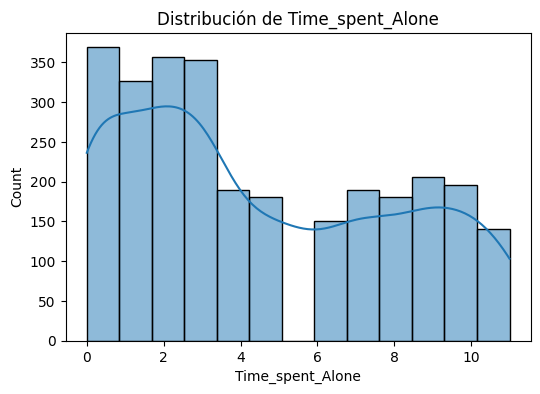

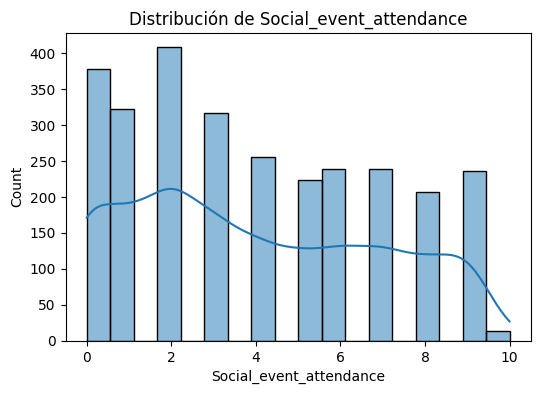

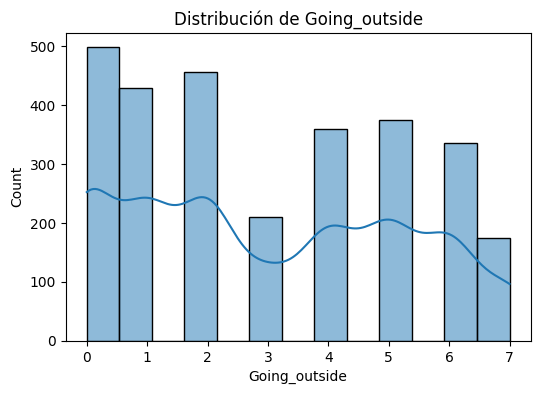

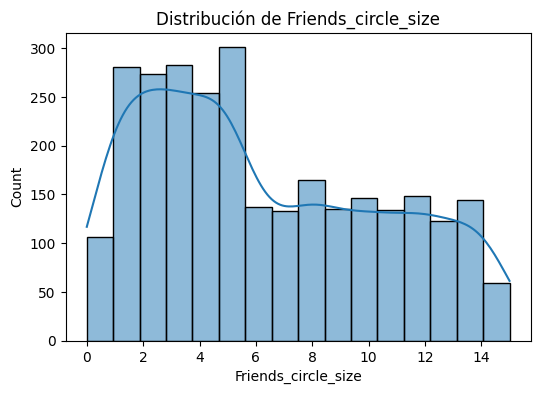

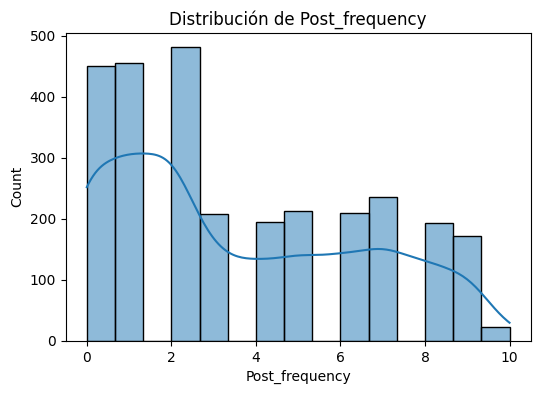

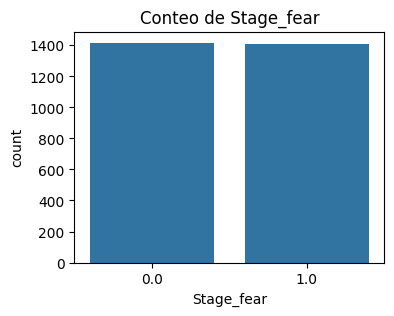

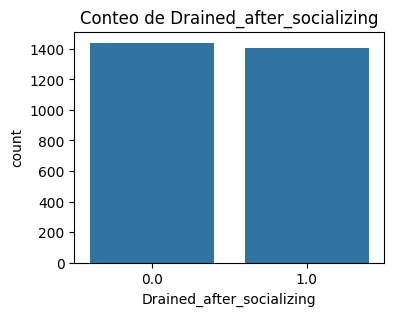

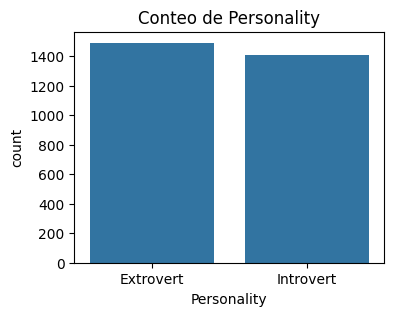

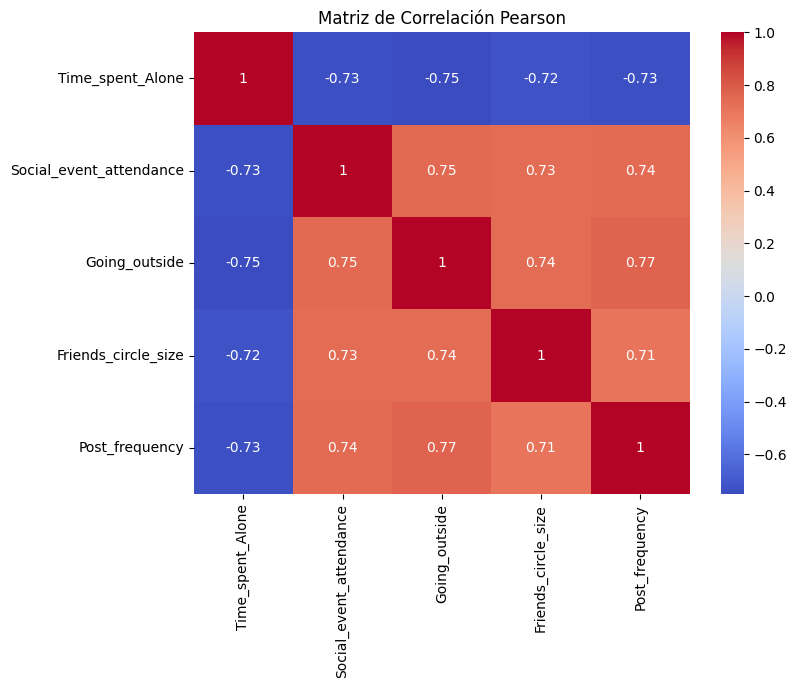

Outliers detectados en Time_spent_Alone: 0
Outliers detectados en Social_event_attendance: 0
Outliers detectados en Going_outside: 0
Outliers detectados en Friends_circle_size: 0
Outliers detectados en Post_frequency: 0


In [399]:
# Distribuciones numéricas
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sb.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Distribuciones categóricas (barras)
cat_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

for col in cat_cols:
    plt.figure(figsize=(4,3))
    sb.countplot(data=df, x=col)
    plt.title(f'Conteo de {col}')
    plt.show()

# Correlación numérica (Pearson)
plt.figure(figsize=(8,6))
sb.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación Pearson')
plt.show()

# Detección inicial de outliers via IQR para cada numérica
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return outliers

for col in num_cols:
    outliers = iqr_outliers(df[col])
    print(f'Outliers detectados en {col}: {len(outliers)}')

## **4. Missing values y outliers**

Realizamos la revisión de los valores en blanco pero como no se encontraron outliers segun el método utilizado, se evalua una opción por comportamiento cruzado

In [400]:
# Total de filas
total_filas = len(df)

# Porcentaje de valores nulos por columna
porcentaje_nulos = (df.isnull().sum() / total_filas) * 100

# Mostrar solo columnas con nulos
porcentaje_nulos[porcentaje_nulos > 0]

,0
Time_spent_Alone,2.172414
Stage_fear,2.517241
Social_event_attendance,2.137931
Going_outside,2.275862
Drained_after_socializing,1.793103
Friends_circle_size,2.655172
Post_frequency,2.241379


In [401]:
# Cálculo del total de valores posibles en el DataFrame
total_celdas = df.shape[0] * df.shape[1]

# Cálculo del total de valores nulos
total_nulos = df.isnull().sum().sum()

# Porcentaje total de valores nulos
porcentaje_total_nulos = round((total_nulos / total_celdas) * 100, 2)

# Mensaje de Margen de error automático
print(f'El {porcentaje_total_nulos} % de los valores son nulos, se decide imputar')

El 1.97 % de los valores son nulos, se decide imputar


In [402]:
from sklearn.impute import SimpleImputer

# Debido a que tenemos variables numericas y categoricas, separo para modificar segun la mediana o moda
num_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
            'Friends_circle_size', 'Post_frequency']

# Columnas categóricas
cat_cols = ['Stage_fear', 'Drained_after_socializing']

# Imputación
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [403]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2900.0,4.494828,3.441971,0.0,2.0,4.0,7.0,11.0
Stage_fear,2900.0,0.486207,0.499896,0.0,0.0,0.0,1.0,1.0
Social_event_attendance,2900.0,3.942759,2.875987,0.0,2.0,3.0,6.0,10.0
Going_outside,2900.0,3.000000,2.221597,0.0,1.0,3.0,5.0,7.0
Drained_after_socializing,2900.0,0.485172,0.499866,0.0,0.0,0.0,1.0,1.0
Friends_circle_size,2900.0,6.235172,4.237255,0.0,3.0,5.0,10.0,15.0
Post_frequency,2900.0,3.552069,2.894794,0.0,1.0,3.0,6.0,10.0


In [404]:
df.describe(include="object").T

,count,unique,top,freq
Personality,2900,2,Extrovert,1491


## **5. Analisis univariado de hipotesis**
# 5.1 La cantidad de tiempo que pasan solos varía según el tipo de personalidad?

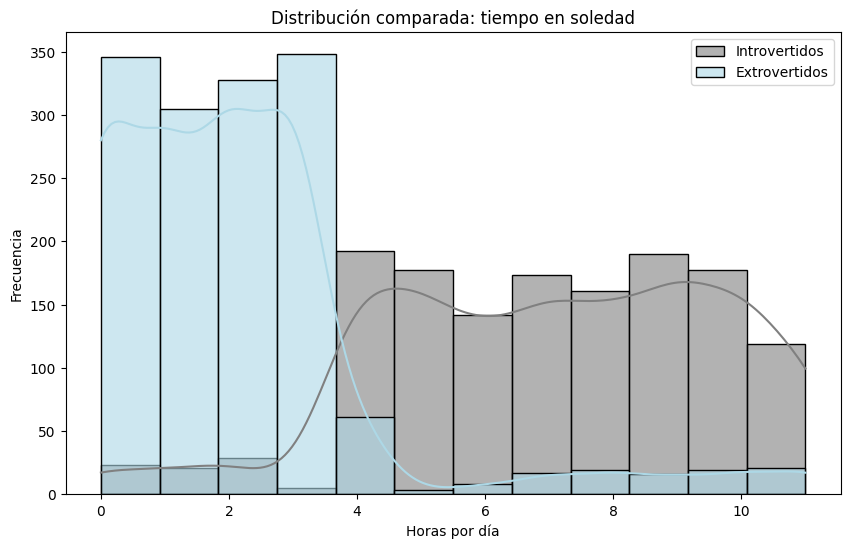

In [405]:
# Histograma de relación de tiempo solos por personalidad
plt.figure(figsize=(10,6))

sb.histplot(df[df['Personality'] == 'Introvert']['Time_spent_Alone'],
            kde=True, bins=12, color='gray', label='Introvertidos', alpha=0.6)

sb.histplot(df[df['Personality'] == 'Extrovert']['Time_spent_Alone'],
            kde=True, bins=12, color='lightblue', label='Extrovertidos', alpha=0.6)

plt.title('Distribución comparada: tiempo en soledad')
plt.xlabel('Horas por día')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 5.2 La cantidad del circulo de amigos tiene que ver con la personalidad?

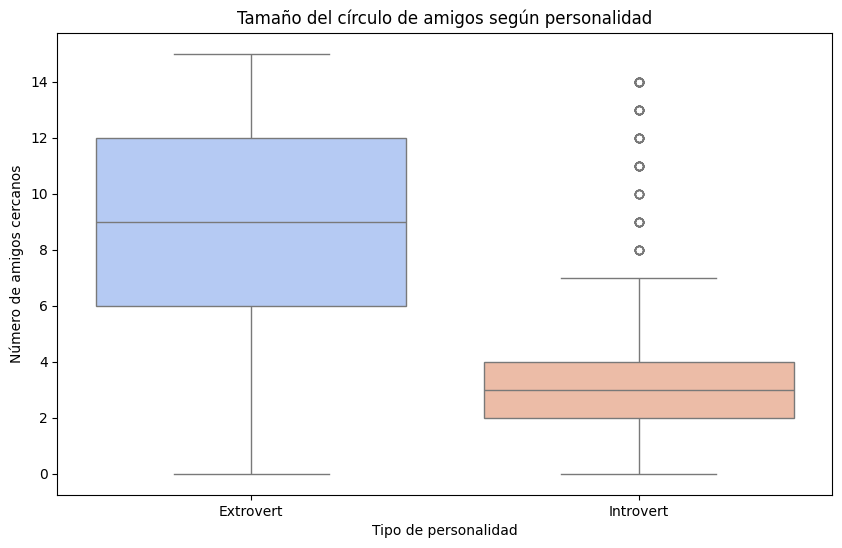

In [406]:
# Gráfico boxplot de relación del tamaño del circulo de amigos
plt.figure(figsize=(10,6))
sb.boxplot(x='Personality', y='Friends_circle_size', data=df, hue='Personality', palette='coolwarm')
plt.title('Tamaño del círculo de amigos según personalidad')
plt.ylabel('Número de amigos cercanos')
plt.xlabel('Tipo de personalidad')
plt.show()

# 5.3 Los extrovertidos asisten con mayor frecuencia a los eventos sociales que los introvertidos?

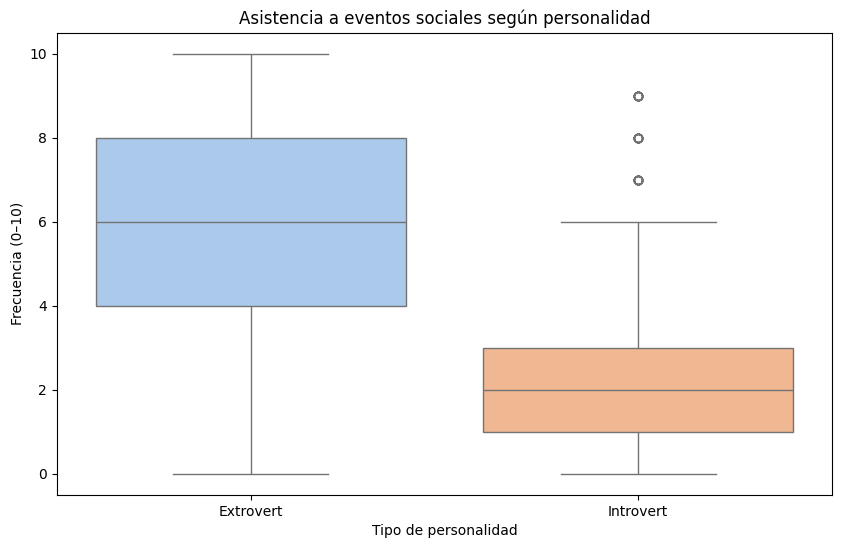

In [407]:
# Gráfico de relación de asistencia a eventos sociales
plt.figure(figsize=(10,6))
sb.boxplot(x='Personality', y='Social_event_attendance', data=df, hue='Personality',palette='pastel')
plt.title('Asistencia a eventos sociales según personalidad')
plt.ylabel('Frecuencia (0–10)')
plt.xlabel('Tipo de personalidad')
plt.show()

## **5.4 Existe una relación entre el medio escenico y la personalidad?**

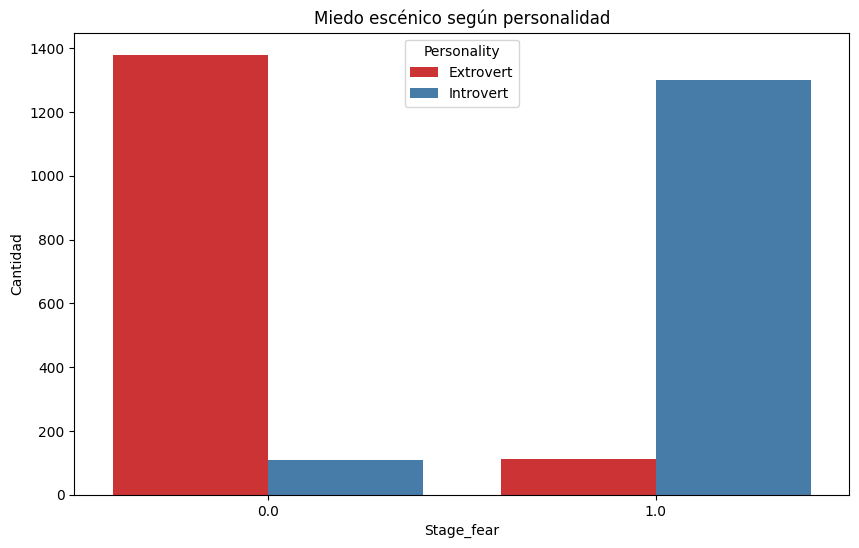

In [408]:
# Gráfico de miedo escenico de acuerdo a la personalidad
plt.figure(figsize=(10,6))
sb.countplot(x='Stage_fear', hue='Personality', data=df, palette='Set1')
plt.title('Miedo escénico según personalidad')
plt.ylabel('Cantidad')
plt.show()

# 5.5 Existe una relación entre el agotamiento luego de socializar con la personalidad?

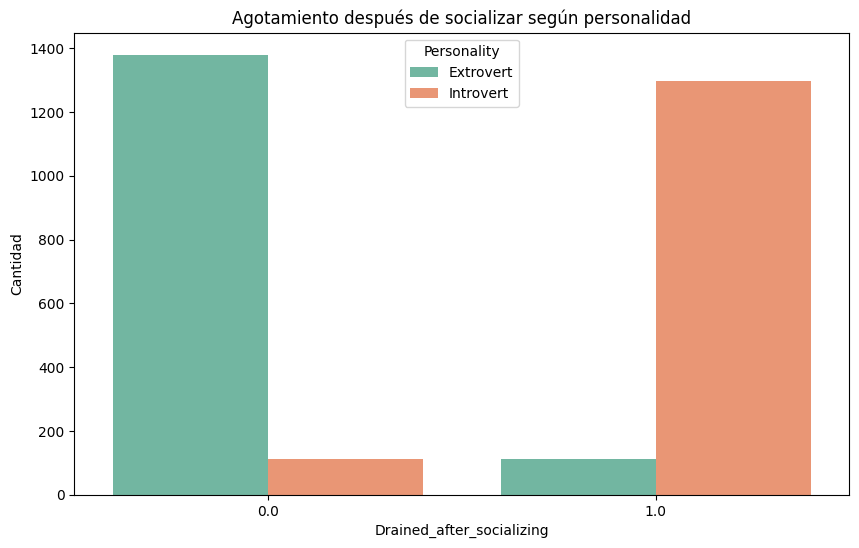

In [409]:
# Grafico de relación de agotamiento
plt.figure(figsize=(10,6))
sb.countplot(x='Drained_after_socializing', hue='Personality', data=df, palette='Set2')
plt.title('Agotamiento después de socializar según personalidad')
plt.ylabel('Cantidad')
plt.show()

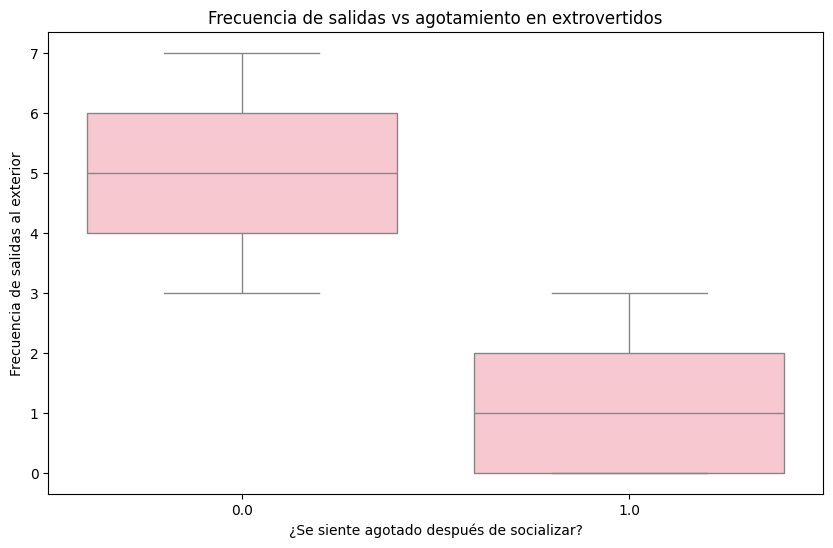

In [410]:
extro_df = df[df['Personality'] == 'Extrovert']

plt.figure(figsize=(10,6))
sb.boxplot(x='Drained_after_socializing', y='Going_outside', data=extro_df, color='pink')
plt.title('Frecuencia de salidas vs agotamiento en extrovertidos')
plt.xlabel('¿Se siente agotado después de socializar?')
plt.ylabel('Frecuencia de salidas al exterior')
plt.show()

# 5.6 Como se relacionan los factores sociales y emocionales para distinguir los extrovertidos de los introvertidos?

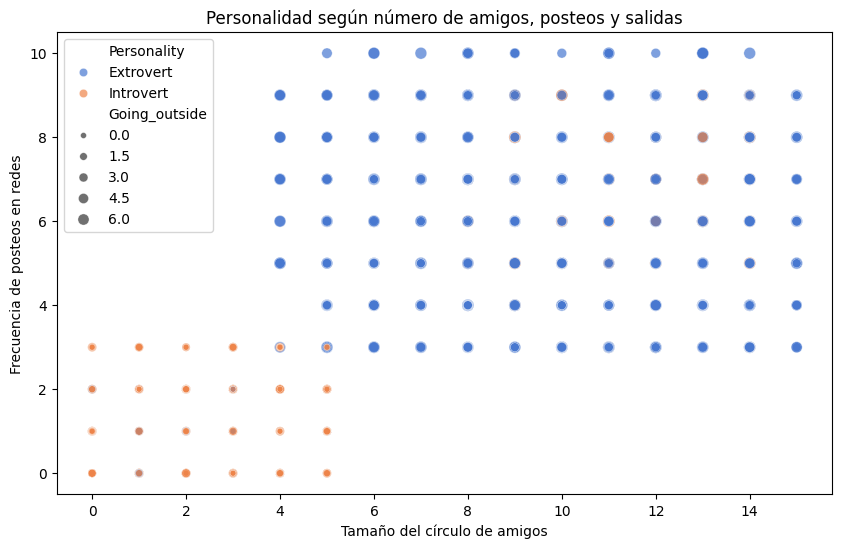

In [411]:
# Gráfico scatterplot de relación del tamaño del circulo de amigos, posteos y salidas
plt.figure(figsize=(10,6))
sb.scatterplot(
    x='Friends_circle_size',
    y='Post_frequency',
    hue='Personality',
    size='Going_outside',
    data=df,
    palette='muted',
    alpha=0.7
)
plt.title('Personalidad según número de amigos, posteos y salidas')
plt.xlabel('Tamaño del círculo de amigos')
plt.ylabel('Frecuencia de posteos en redes')
plt.show()


In [412]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2900.0,4.494828,3.441971,0.0,2.0,4.0,7.0,11.0
Stage_fear,2900.0,0.486207,0.499896,0.0,0.0,0.0,1.0,1.0
Social_event_attendance,2900.0,3.942759,2.875987,0.0,2.0,3.0,6.0,10.0
Going_outside,2900.0,3.000000,2.221597,0.0,1.0,3.0,5.0,7.0
Drained_after_socializing,2900.0,0.485172,0.499866,0.0,0.0,0.0,1.0,1.0
Friends_circle_size,2900.0,6.235172,4.237255,0.0,3.0,5.0,10.0,15.0
Post_frequency,2900.0,3.552069,2.894794,0.0,1.0,3.0,6.0,10.0


In [413]:

# Analisis de datos numericos y categoricos

# Bajamos a minúsculas todas menos 'Personality'
cols_lower = [c.lower() if c != 'Personality' else c for c in df.columns]
df.columns = cols_lower

num_vars = ['time_spent_alone', 'social_event_attendance', 'going_outside', 'friends_circle_size', 'post_frequency']
cat_vars = ['stage_fear', 'drained_after_socializing']
target_col = 'Personality'

# T-test
print("T-test para variables numéricas:\n")

for var in num_vars:
    if var not in df.columns:
        print(f"{var}: Variable no encontrada en df")
        continue

    group0 = df[df[target_col] == 'Introvert'][var].dropna()
    group1 = df[df[target_col] == 'Extrovert'][var].dropna()

    std0 = group0.std()
    std1 = group1.std()

    if std0 == 0 or std1 == 0:
        print(f"{var}: No se puede realizar t-test (varianza cero en uno de los grupos)")
    else:
        t_stat, p_val = ttest_ind(group0, group1)
        print(f"{var}: t = {t_stat:.3f}, p = {p_val:.5f}")

# Chi2
print("\nChi² para variables categóricas:\n")
for var in cat_vars:
    if var not in df.columns:
        print(f"{var}: Variable no encontrada en df")
        continue

    contingency = pd.crosstab(df[var], df[target_col])
    chi2, p_val, dof, expected = chi2_contingency(contingency)

    n = contingency.sum().sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

    print(f"{var}: chi² = {chi2:.3f}, p = {p_val:.5f}, dof = {dof}, Cramér’s V = {cramer_v:.3f}")
    #p=0  indica que es muchísimo menor que 0.00001; es decir, la probabilidad de que estas diferencias sean por azar es prácticamente nula.

T-test para variables numéricas:

time_spent_alone: t = 54.659, p = 0.00000
social_event_attendance: t = -56.105, p = 0.00000
going_outside: t = -59.095, p = 0.00000
friends_circle_size: t = -50.800, p = 0.00000
post_frequency: t = -55.984, p = 0.00000

Chi² para variables categóricas:

stage_fear: chi² = 2079.392, p = 0.00000, dof = 1, Cramér’s V = 0.847
drained_after_socializing: chi² = 2069.193, p = 0.00000, dof = 1, Cramér’s V = 0.845


In [414]:
# Separar variables predictoras y target
X = df.drop('Personality', axis=1)
y = df['Personality']

# Método: Selección univariada ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Ver columnas seleccionadas
selected_features = X.columns[selector.get_support()]
print("Mejores características:", list(selected_features))

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42, stratify=y
)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

y_train_bal = y_train_bal.map({'Introvert': 0, 'Extrovert': 1})

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Modelo base
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_bal)
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

Mejores características: ['stage_fear', 'social_event_attendance', 'going_outside', 'drained_after_socializing', 'post_frequency']


Valores únicos en y_test_bin: [0 1]
Valores únicos en y_pred_bin: [1 0]
Accuracy: 0.9172413793103448
Recall: 0.8959731543624161
Precision: 0.9401408450704225
F1: 0.9175257731958762
ROC AUC: 0.8986029796753772


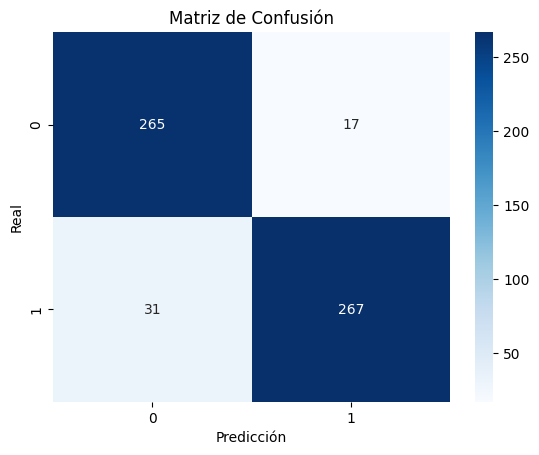

In [415]:
# Si y_test está en texto, mapearlo:
if y_test.dtype == 'object' or y_test.dtype.name == 'category':
    y_test_bin = y_test.map({'Introvert': 0, 'Extrovert': 1})
else:
    y_test_bin = y_test.copy()

# Para y_pred, lo mismo:
y_pred_series = pd.Series(y_pred)
if y_pred_series.dtype == 'object' or y_pred_series.dtype.name == 'category':
    y_pred_bin = y_pred_series.map({'Introvert': 0, 'Extrovert': 1})
else:
    y_pred_bin = y_pred_series.copy()

# Verificación simple:
print("Valores únicos en y_test_bin:", y_test_bin.unique())
print("Valores únicos en y_pred_bin:", y_pred_bin.unique())

print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
print("Recall:", recall_score(y_test_bin, y_pred_bin))
print("Precision:", precision_score(y_test_bin, y_pred_bin))
print("F1:", f1_score(y_test_bin, y_pred_bin))
print("ROC AUC:", roc_auc_score(y_test_bin, y_proba))

sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Valores únicos en y_test_bin: [0 1]
Valores únicos en y_pred_bin: [1 0]
Accuracy: 0.9172413793103448
Recall: 0.8959731543624161
Precision: 0.9401408450704225
F1: 0.9175257731958762
ROC AUC: 0.8986029796753772


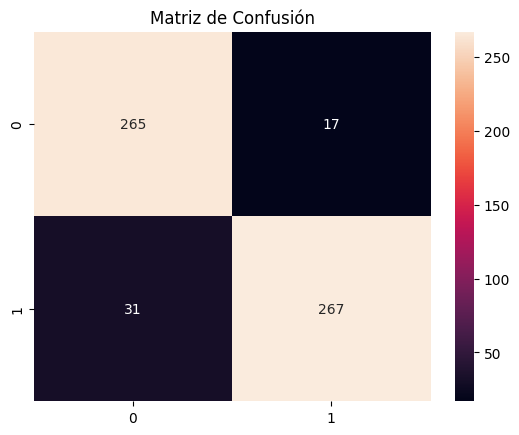

In [416]:
# Si y_test está en texto, mapearlo:
if y_test.dtype == 'object' or y_test.dtype.name == 'category':
    y_test_bin = y_test.map({'Introvert': 0, 'Extrovert': 1})
else:
    y_test_bin = y_test.copy()

# Para y_pred, lo mismo:
y_pred_series = pd.Series(y_pred)
if y_pred_series.dtype == 'object' or y_pred_series.dtype.name == 'category':
    y_pred_bin = y_pred_series.map({'Introvert': 0, 'Extrovert': 1})
else:
    y_pred_bin = y_pred_series.copy()

# Verificación simple:
print("Valores únicos en y_test_bin:", y_test_bin.unique())
print("Valores únicos en y_pred_bin:", y_pred_bin.unique())

print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
print("Recall:", recall_score(y_test_bin, y_pred_bin))
print("Precision:", precision_score(y_test_bin, y_pred_bin))
print("F1:", f1_score(y_test_bin, y_pred_bin))
print("ROC AUC:", roc_auc_score(y_test_bin, y_proba))  # Aquí y_proba debe ser la probabilidad para la clase 1

# Matriz de Confusión
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d')
plt.title("Matriz de Confusión")
plt.show()

In [417]:
odds_ratios = np.exp(logreg.coef_[0])
for feature, odds in zip(selected_features, odds_ratios):
    print(f"{feature}: Odds Ratio = {odds:.2f}")

stage_fear: Odds Ratio = 0.29
social_event_attendance: Odds Ratio = 0.95
going_outside: Odds Ratio = 1.09
drained_after_socializing: Odds Ratio = 0.28
post_frequency: Odds Ratio = 1.19


In [418]:
#y_train_bal_num = y_train_bal.map({'Introvert': 0, 'Extrovert': 1})
y_train_bal_num = y_train_bal

enet = ElasticNetCV(cv=5, random_state=42, max_iter=10000)
enet.fit(X_train_scaled, y_train_bal_num)

y_pred_cont = enet.predict(X_test_scaled)

print("R2 ajustado:", enet.score(X_test_scaled, y_test.map({'Introvert':0, 'Extrovert':1})))
mse = mean_squared_error(y_test.map({'Introvert':0, 'Extrovert':1}), y_pred_cont)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2 ajustado: 0.6696401253866994
RMSE: 0.28727533445352466


In [419]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X[selected_features], y, cv=cv, scoring='roc_auc')
print("ROC-AUC promedio (5-fold):", np.mean(cv_scores))

ROC-AUC promedio (5-fold): 0.920854775053088


# Conclusiones


El modelo de clasificación logístico (LogisticRegression) tiene  muy buen desempeño predictivo con una accuracy superior al 91% y un AUC validado por CV superior al 92%.

Esto nos permite identificar a los extrovertidos con alta precisión y recall.

Los factores más determinantes para la personalidad son el miedo escénico (stage_fear) y sentirse drenado tras socializar (drained_after_socializing) ya que tienen un ratio odds superior a 1.

El modelo de regresión (ElasticNet) también da buenos resultados, lo que respalda la robustez de los datos y la relación entre variables.



